In [67]:
import pandas as pd
import seaborn as sns
import sklearn.cluster as cluster
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as SC
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.preprocessing import LabelEncoder

big_data = pd.read_csv('airbnb_coded.2.0.csv')
sc = SC()
sc_y = SC()
le = LabelEncoder()
knn = KNN(n_neighbors=65, weights='distance')

pd.options.mode.chained_assignment = None  # default='warn'

In [68]:
price_cluster = []
for index in big_data['price_x']:
    if index>=5000:
        price_cluster.append(4)
    elif index >=1000:
        price_cluster.append(3)
    elif index>=500:
        price_cluster.append(2)
    elif index>=100:
        price_cluster.append(1)
    else:
        price_cluster.append(0)
big_data['price_class'] = price_cluster
big_data.head()

,Unnamed: 0,Unnamed: 0.1,id,host_since,host_total_listings_count,property_type,accommodates,bathrooms,bedrooms,beds,...,bed_code,room_code,verified_id,profile_pic,superhost,phone_verified,buisiness_travel,instant_book,listing_class,price_class
0,0,0,8998355.0,42297.0,2.0,Apartment,2.0,1.0,2.0,2.0,...,2.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0,0
1,1,1,4534251.0,41610.0,1.0,Apartment,4.0,1.0,2.0,2.0,...,2.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0,0
2,2,2,22314560.0,43087.0,1.0,Apartment,4.0,1.0,2.0,2.0,...,2.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,4,0
3,3,3,17838393.0,41565.0,1.0,Apartment,6.0,1.5,3.0,4.0,...,2.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1,0
4,4,4,25123411.0,43236.0,1.0,Apartment,5.0,1.0,2.0,5.0,...,2.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,3,1


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-2])], remainder='passthrough')
var = 'bathrooms'
var2 = 'accommodates'
var3 = 'cleaning_fee'
var4 = 'bedrooms'
var5 = 'beds'
var6 = 'minimum_nights_x'
var7 = 'maximum_nights'
var8 = 'number_of_reviews_y'
var9 = 'listing_class'
var10 = 'price_x'
var11 = 'bed_code'
var12 = 'cancellation_policy_mapped'
var13 = 'room_code'
var14 = 'superhost'
var15 = 'instant_book'
var16 = 'review_scores_location'
var17 = 'review_scores_rating'
var18 = 'host_total_listings_count'
var19 = 'availability_90'
var20 = 'room_code'
var21 = 'extra_people'
var22 = 'price_class'


data = big_data[[var18, var2, var3, var22, var10]]


# data[var] = data[var].fillna(data[var].median())
data[var2] = data[var2].fillna(data[var2].median())
data[var3] = data[var3].fillna(data[var3].median())
# data[var4] = data[var4].fillna(data[var4].median())
# data[var5] = data[var5].fillna(data[var5].median())

# data[var6][17990] = data[var6].median()
# data[var6][6215] = data[var6].median()
# data[var6][11299] = data[var6].median()
# data[var6][12737] = data[var6].median()
# data[var6][14598] = data[var6].median()
# data[var7][872] = 8000
# data[var7][2372] = 8000
# data[var7][4391] = 8000
# data[var7][17952] = 8000
# data[var7][17990] = data[var7].median()
# data[var7][6351] = data[var7].median()
# data[var7][8341] = data[var7].median()


# data[var6] = data[var6].fillna(data[var6].median())
# data[var7] = data[var7].fillna(data[var7].median())
# data[var8] = data[var8].fillna(data[var8].median())
# data[var10] = data[var10].fillna(data[var10].median())
# data[var11] = data[var11].fillna(data[var11].median())
# data[var12] = data[var12].fillna(data[var12].median())
# data[var13] = data[var13].fillna(data[var13].median())
# data[var14] = data[var14].fillna(data[var14].median())
# data[var15] = data[var15].fillna(data[var15].median())
# data[var16] = data[var16].fillna(data[var16].median())
# data[var17] = data[var17].fillna(data[var17].median())
data[var18] = data[var18].fillna(data[var18].median())
# data[var19] = data[var19].fillna(data[var19].median())
# data[var20] = data[var20].fillna(data[var20].median())
# data[var21] = data[var21].fillna(data[var21].median())
# data['property_type'] = data['property_type'].fillna('Apartment')


# data[var6][17990] = data[var6].median()

X = data.iloc[:, :-2].values
y = data.iloc[:, -2].values
# X = ct.fit_transform(X)
# X = X.todense()
# X = np.array(X)
# X = ct.fit_transform(X)
# # X = X.todense()
# X = np.array(X)
# X = ct.fit_transform(X)
# # X = X.todense()
# X = np.array(X)
# X = ct.fit_transform(X)
# # X = X.todense()
# X = np.array(X)
# # ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-4])], remainder='passthrough')
# X = ct.fit_transform(X)
# # X = X.todense()
# X = np.array(X)
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-5])], remainder='passthrough')
# X = ct.fit_transform(X)
# X = X.todense()
# X = np.array(X)
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-6])], remainder='passthrough')
# X = ct.fit_transform(X)
# # X = X.todense()
# X = np.array(X)

# plt.scatter(data[var6].values, data[var7].values, s=100, c='red', alpha=0.5)
# plt.show()

# X[:,-8:] = sc.fit_transform(X[:,-8:])
# X = sc.fit_transform(X)
counter = 0
for i in range(len(y)):
    if y[i]>=6000:
        counter+=1
print(counter)
print(max(y.T))
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

# data.head()

0
4


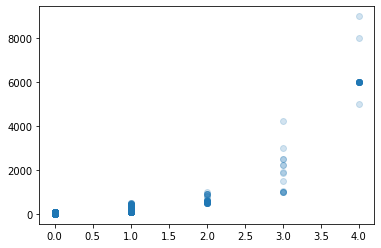

In [74]:
plt.scatter(data[var22].values, data[var10].values, alpha=0.2)


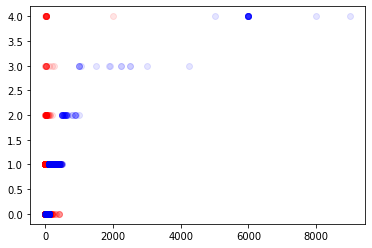

In [75]:
plt.scatter(data[var3].values, data['price_class'].values, alpha=0.1, c='red')
plt.scatter(data[var10].values, data['price_class'].values, alpha=0.1, c='blue')

In [76]:
X_cat = data[[var18, var2, var3]].values
y_cat = data[[var22]].values
X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, test_size = 0.3)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=2)
classifier = classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
classifier.score(X_test, y_test)

0.9026765917009819


0.9009791243303159

In [77]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_cat, 
                          y_cat, scoring='accuracy', cv=10)
print(scores)
np.mean(scores)

[0.89584488 0.90687361 0.89855876 0.90521064 0.90077605 0.90022173
 0.904102   0.90521064 0.90354767 0.90077605]


0.9021122037208787

In [78]:
# X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

In [83]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=2)
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# y_test[:,-1] = y_pred
len(y_test)

5413

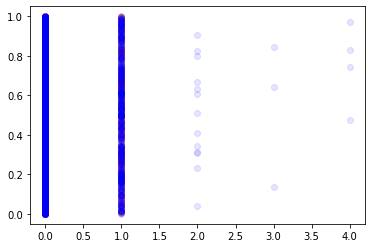

In [87]:
yy = np.random.rand(5413,1)
plt.scatter(y_pred, yy, alpha=0.1, c='red')
plt.scatter(np.array(y_test), yy, alpha=0.1, c='blue')

In [51]:
big_data.to_csv('airbnb_coded.3.0.csv')

In [52]:
import pandas as pd
import seaborn as sns
import sklearn.cluster as cluster
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as SC
from sklearn.neighbors import KNeighborsRegressor as KNN

big_data = pd.read_csv('airbnb_coded.3.0.csv')
sc = SC()
sc_y = SC()
knn = KNN(n_neighbors=65, weights='distance')

pd.options.mode.chained_assignment = None  # default='warn'

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
var = 'bathrooms'
var2 = 'accommodates'
var3 = 'cleaning_fee'
var4 = 'bedrooms'
var5 = 'beds'
var6 = 'minimum_nights_x'
var7 = 'maximum_nights'
var8 = 'number_of_reviews_y'
var9 = 'listing_class'
var10 = 'price_x'
var11 = 'bed_code'
var12 = 'cancellation_policy_mapped'
var13 = 'room_code'
var14 = 'superhost'
var15 = 'instant_book'
var16 = 'review_scores_location'
var17 = 'review_scores_rating'
var18 = 'host_total_listings_count'
var19 = 'availability_90'
var20 = 'room_code'
var21 = 'extra_people'
var22 = 'price_class'


data = big_data[[var18, var2, var3, var, var6, var8,  var17, var21, var19, var9, var12, var20, var14, var10, var22]]

data[var] = data[var].fillna(data[var].median())
data[var2] = data[var2].fillna(data[var2].median())
data[var3] = data[var3].fillna(data[var3].median())
# data[var4] = data[var4].fillna(data[var4].median())
# data[var5] = data[var5].fillna(data[var5].median())

data[var6][17990] = data[var6].median()
data[var6][6215] = data[var6].median()
data[var6][11299] = data[var6].median()
data[var6][12737] = data[var6].median()
data[var6][14598] = data[var6].median()
# data[var7][872] = 8000
# data[var7][2372] = 8000
# data[var7][4391] = 8000
# data[var7][17952] = 8000
# data[var7][17990] = data[var7].median()
# data[var7][6351] = data[var7].median()
# data[var7][8341] = data[var7].median()


data[var6] = data[var6].fillna(data[var6].median())
# data[var7] = data[var7].fillna(data[var7].median())
data[var8] = data[var8].fillna(data[var8].median())
data[var10] = data[var10].fillna(data[var10].median())
# data[var11] = data[var11].fillna(data[var11].median())
data[var12] = data[var12].fillna(data[var12].median())
# data[var13] = data[var13].fillna(data[var13].median())
data[var14] = data[var14].fillna(data[var14].median())
# data[var15] = data[var15].fillna(data[var15].median())
# data[var16] = data[var16].fillna(data[var16].median())
data[var17] = data[var17].fillna(data[var17].median())
data[var18] = data[var18].fillna(data[var18].median())
data[var19] = data[var19].fillna(data[var19].median())
data[var20] = data[var20].fillna(data[var20].median())
data[var21] = data[var21].fillna(data[var21].median())


data[var6][17990] = data[var6].median()

data = data.drop(data.index[17990])
data = data.drop(data.index[14598])



X = data.iloc[:, :].values
y = data.iloc[:, -1].values
X = ct.fit_transform(X)
# X = X.todense()
X = np.array(X)
X = ct.fit_transform(X)
# X = X.todense()
X = np.array(X)
X = ct.fit_transform(X)
# X = X.todense()
X = np.array(X)
X = ct.fit_transform(X)
# X = X.todense()
X = np.array(X)
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-4])], remainder='passthrough')
# X = ct.fit_transform(X)
# # X = X.todense()
# X = np.array(X)
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-5])], remainder='passthrough')
# X = ct.fit_transform(X)
# X = X.todense()
# X = np.array(X)
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-6])], remainder='passthrough')
# X = ct.fit_transform(X)
# # X = X.todense()
# X = np.array(X)

# plt.scatter(data[var6].values, data[var7].values, s=100, c='red', alpha=0.5)
# plt.show()

print(X)
# X[:,-8:] = sc.fit_transform(X[:,-8:])
# X = sc.fit_transform(X)
print(len(X[0]))
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

# data.head()

[[  1.   0.   0. ...  97.   0.   0.]
 [  1.   0.   0. ...  75.   0.   0.]
 [  0.   0.   0. ...  80.  10.  83.]
 ...
 [  0.   0.   0. ...  99.  19.   6.]
 [  0.   0.   0. ...  90.  10.   0.]
 [  1.   0.   0. ... 100.   0.   0.]]
21


In [56]:
# X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

In [57]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=2)
print(y_test[:,-1])
classifier = classifier.fit(X_train[:,:3], y_train[:,-1])
y_pred = classifier.predict(X_test[:,:3])
# y_test[:,-1] = y_pred
# np.array(y_test[:,-1])

[1. 0. 0. ... 1. 0. 0.]


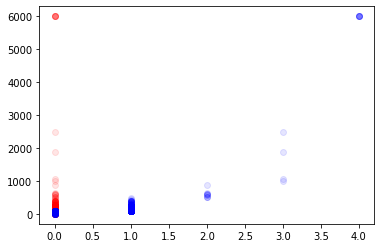

In [58]:
plt.scatter(y_pred, np.array(y_test[:,-2]), alpha=0.1, c='red')
plt.scatter(np.array(y_test[:,-1]), np.array(y_test[:,-2]), alpha=0.1, c='blue')

In [12]:
from sklearn.ensemble import RandomForestRegressor as RFR
rf = RFR(n_estimators=500, min_samples_leaf=1)
rf = rf.fit(X_train, y_train[:,-2])
rf.score(X_train, y_train[:,-2])

0.9643113004434647

In [ ]:
rf.score(X_test, y_test[:,-2])

In [ ]:
# rf = RFR(n_estimators=500, min_samples_leaf=10)
# rf = rf.fit(X_train, y_train)
# rf.score(X_train, y_train)

In [ ]:
# rf.score(X_test, y_test)

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, 
                          y, scoring='r2', cv=10)
print(scores)
print(np.mean(scores))
np.std(scores)

[0.96399424 0.35206444 0.87540843 0.76764399 0.95998444 0.60615038
 0.84268381 0.78519998 0.71470277 0.94645633]
0.781428880757405


0.18021197709847947

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, 
                          y, scoring='r2', cv=15)
print(scores)
print(np.mean(scores))
np.std(scores)

In [ ]:
array = data[var10].isna()
array = array.values
for i in range(len(array)):
    if array[i]:
        print(i)

In [ ]:
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

In [ ]:
knn.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = -cross_val_score(knn, X, 
                          y, scoring='neg_mean_absolute_error', cv=5)
print(scores)
np.mean(scores)

In [ ]:
from sklearn.tree import DecisionTreeRegressor as DTR
dt = DTR(min_samples_leaf=10)
dt = dt.fit(X_train, y_train)
dt.score(X_train, y_train)

In [ ]:
dt.score(X_test, y_test)

In [ ]:
scores = -cross_val_score(dt, X, 
                          y, scoring='neg_mean_absolute_error', cv=5)
print(scores)
np.mean(scores)